In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch as th

In [2]:
# --- 2. SETUP FOR ACADEMIC STYLE ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
    "axes.labelsize": 18,
    "legend.fontsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "figure.titlesize": 18,
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}"
})

## Load data

In [3]:
loc = "../local_data/circuit"

In [4]:
results_crx_1 = th.load(f"{loc}/result1_6q_crx.pt")
results_crx_2 = th.load(f"{loc}/result2_6q_crx.pt")

results_cnot_1 = th.load(f"{loc}/result1_6q_cnot.pt")
results_cnot_2 = th.load(f"{loc}/result2_6q_cnot.pt")

In [5]:
layers_crx = np.arange(2, 25, 2)
layers_cnot = np.arange(2, 15, 2)

## CRX Gates

In [6]:
var1_crx = []
var2_crx = []
var0_crx = []

for l in range(len(layers_crx)):
    var1_crx.append(th.std(results_crx_1[l]))
    var2_crx.append(th.std(th.mean(results_crx_2[l], dim=1)).cpu())
    var0_crx.append(th.std(results_crx_2[l][:,0]).cpu())

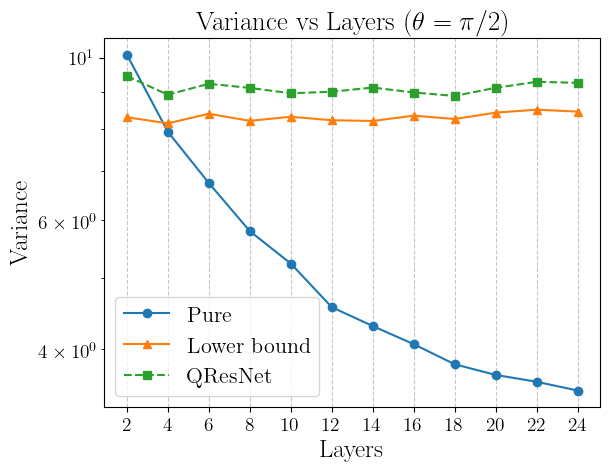

In [7]:
plt.plot(layers_crx, var1_crx, marker='o', label='Pure')
plt.plot(layers_crx, var2_crx, marker='^', label='Lower bound')
plt.plot(layers_crx, var0_crx, marker='s', label='QResNet', linestyle='--')
plt.xlabel('Layers')
plt.grid(axis='x', which='both', linestyle='--', alpha=0.7)
plt.xticks(layers_crx)
plt.yscale('log')
plt.ylabel('Variance')
plt.title(r'Variance vs Layers ($\theta=\pi/2$)')
plt.legend()
plt.show()

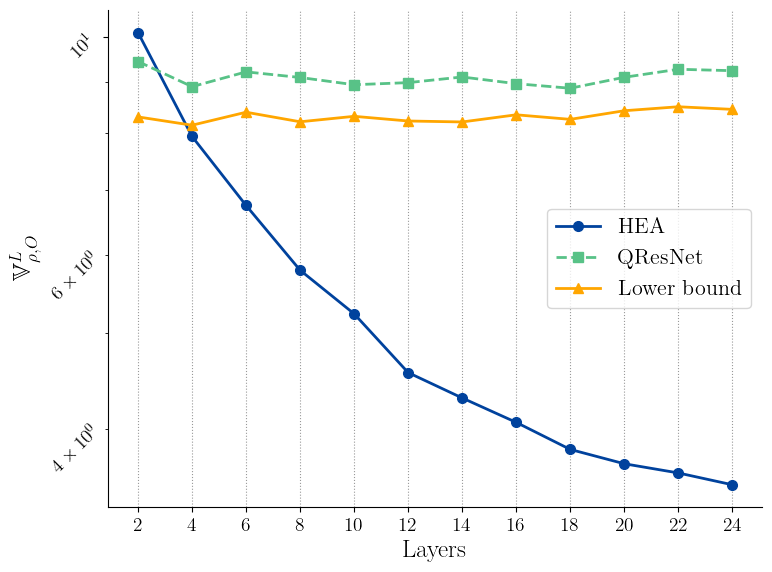

In [14]:


# --- 3. PLOTTING ---
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#00429d', '#ffa600', '#58c287']

ax.plot(layers_crx, var1_crx, marker='o', markersize=7, linestyle='-', label='HEA', color=colors[0], linewidth=2)
ax.plot(layers_crx, var0_crx, marker='s', markersize=7, linestyle='--', label='QResNet', color=colors[2], linewidth=2)
ax.plot(layers_crx, var2_crx, marker='^', markersize=7, linestyle='-', label='Lower bound', color=colors[1], linewidth=2)


ax.set_xlabel('Layers')
ax.set_ylabel(r'$\mathbb{V}_{\rho,O}^L$')
#ax.set_title(r'Variance vs Layers ($\theta = \pi/2$)')

ax.set_xticks(layers_crx)
ax.set_yscale('log')

# --- STYLE REFINEMENTS ---

# 👇 THIS IS THE NEW LINE TO ROTATE THE TICKS
ax.tick_params(axis='y', which='both', rotation=45)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.grid(axis='y', linestyle=':', color='gray', alpha=0.6)
ax.grid(axis='x', linestyle=':', color='gray', alpha=0.8)
ax.legend(loc='center right',)

plt.tight_layout()
plt.show()
fig.savefig("circuit_6q_crx.pdf", format="pdf", bbox_inches='tight')

## CNOT Gates

In [9]:
var1_cnot = []
var2_cnot = []
var0_cnot = []

for l in range(len(layers_cnot)):
    var1_cnot.append(th.std(results_cnot_1[l]))
    var2_cnot.append(th.std(th.mean(results_cnot_2[l], dim=1)).cpu())
    var0_cnot.append(th.std(results_cnot_2[l][:,0]).cpu())

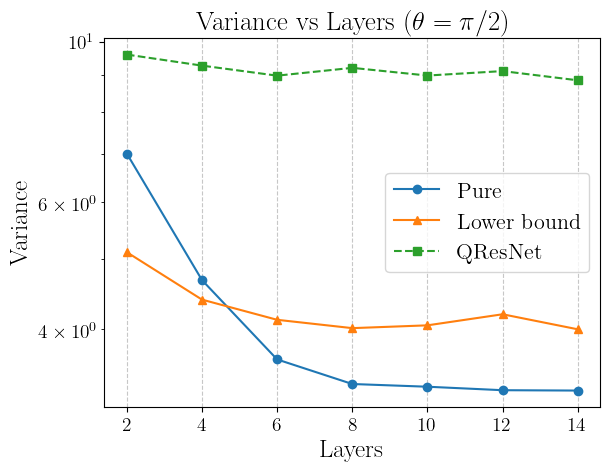

In [10]:
plt.plot(layers_cnot, var1_cnot, marker='o', label='Pure')
plt.plot(layers_cnot, var2_cnot, marker='^', label='Lower bound')
plt.plot(layers_cnot, var0_cnot, marker='s', label='QResNet', linestyle='--')
plt.xlabel('Layers')
plt.grid(axis='x', which='both', linestyle='--', alpha=0.7)
plt.xticks(layers_cnot)
plt.ylabel('Variance')
plt.yscale('log')
plt.title(r'Variance vs Layers ($\theta=\pi/2$)')
plt.legend()
plt.show()

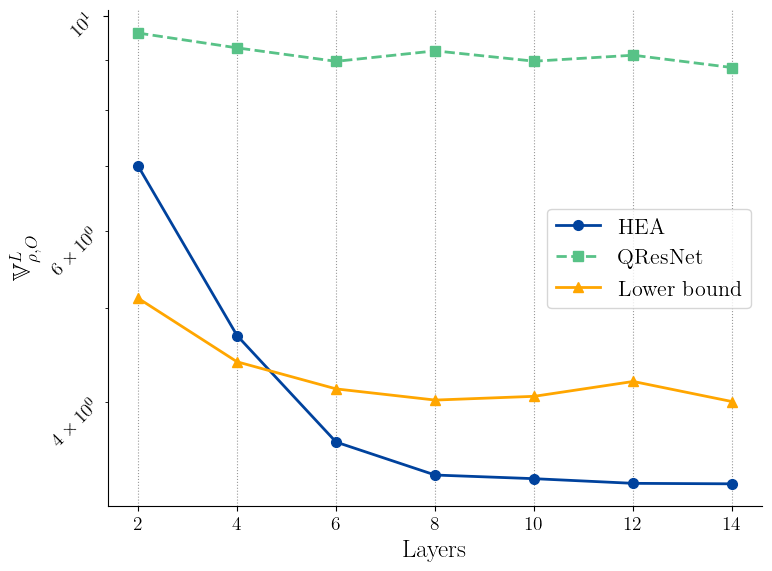

In [15]:


# --- 3. PLOTTING ---
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#00429d', '#ffa600', '#58c287']

ax.plot(layers_cnot, var1_cnot, marker='o', markersize=7, linestyle='-', label='HEA', color=colors[0], linewidth=2)
ax.plot(layers_cnot, var0_cnot, marker='s', markersize=7, linestyle='--', label='QResNet', color=colors[2], linewidth=2)
ax.plot(layers_cnot, var2_cnot, marker='^', markersize=7, linestyle='-', label='Lower bound', color=colors[1], linewidth=2)


ax.set_xlabel('Layers')
ax.set_ylabel(r'$\mathbb{V}_{\rho,O}^L$')
#ax.set_title(r'Variance vs Layers ($\theta = \pi/2$)')

ax.set_xticks(layers_cnot)
ax.set_yscale('log')

# --- STYLE REFINEMENTS ---

# 👇 THIS IS THE NEW LINE TO ROTATE THE TICKS
ax.tick_params(axis='y', which='both', rotation=45)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.grid(axis='y', linestyle=':', color='gray', alpha=0.6)
ax.grid(axis='x', linestyle=':', color='gray', alpha=0.8)
ax.legend(loc='best', )

plt.tight_layout()
plt.show()
fig.savefig("circuit_6q_cnot.pdf", format="pdf", bbox_inches='tight')